# New York Taxi and Uber Pick Up  Analysis

In [1]:
import pandas as pd
import numpy as np


Visualize Raw Data and represent each column.

In [2]:
uberrawdata = pd.read_csv('data/uber-raw-data-jul14.csv')
uberrawdata.head()


,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512


Check if data is clean

In [3]:
uberrawdata.isnull().sum()


Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

Visualize Raw Data and represent each column.

In [4]:
ubertripdata=pd.read_csv('data/uber-raw-data-janjune-15.csv')
ubertripdata.head()


,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


Check if data is clean

In [5]:
ubertripdata.isnull().sum()

Dispatching_base_num         0
Pickup_date                  0
Affiliated_base_num     162195
locationID                   0
dtype: int64

Visualize Raw Data and represent each column.

In [2]:
nyctaxi=pd.read_csv("data/yellow_tripdata_2016-01.csv")
nyctaxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8


Check if data is clean

In [8]:
nyctaxi.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

Box Plot of  locations to remove outliers

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


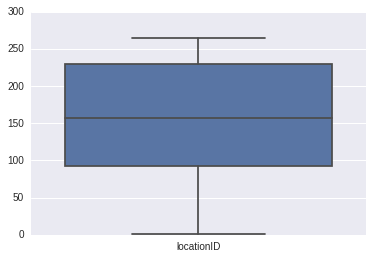

In [8]:
import seaborn as sns
%matplotlib inline

sns.boxplot(ubertripdata[['locationID']])

Box Plot of  locations to remove outliers

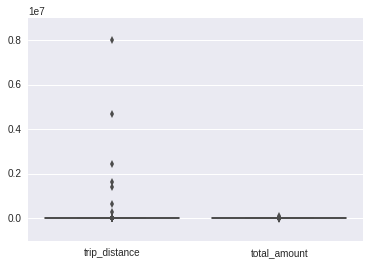

In [9]:
sns.boxplot(nyctaxi[['trip_distance','total_amount']])


Finding ouutliers in trip distance and total amount.

In [10]:
from collections import defaultdict
outliers=defaultdict(lambda:0)
for components in ('trip_distance','total_amount'):
    q1=nyctaxi[components].quantile(0.25);
    q3=nyctaxi[components].quantile(0.75);
    outlierange=1.5*(q3-q1)
    outliers_df = nyctaxi[(nyctaxi[components] < (q1 - outlierange)) | (nyctaxi[components] > (q3 + outlierange))]
    
    for index in outliers_df.index.values:
        outliers[index] += 1
    print "total outliers:\t",components,outliers_df.shape[0]
    

total outliers:	trip_distance 1152637
total outliers:	total_amount 978950


Comparing outliers to total data points to check if the results are reasonable

In [16]:
print "Total Trip distance:\t", nyctaxi['trip_distance'].count()
print "Total Total Amount;\t",nyctaxi['total_amount'].count()

Total Trip distance:	10906858
Total Total Amount;	10906858


In [ ]:
Ploting Corelation matrix .Understanding the relation between different components

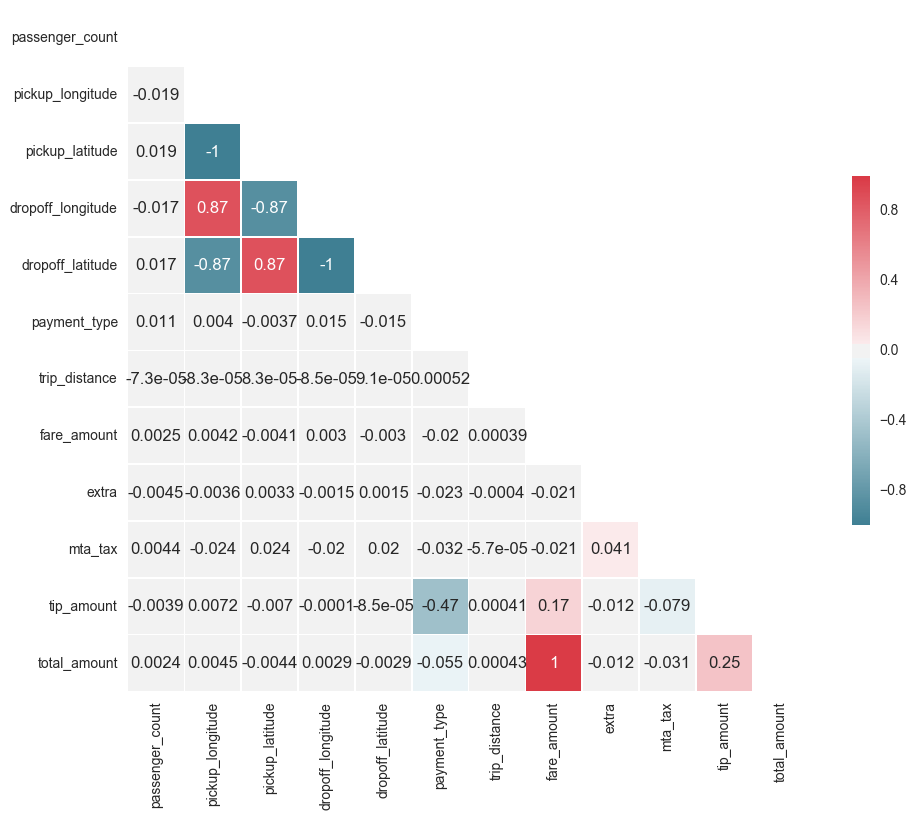

In [3]:
#######################################################################################
# Correlation Matrix
#######################################################################################
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(style="white")

# Compute the correlation matrix
corr = nyctaxi[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude','dropoff_longitude', 'dropoff_latitude','payment_type','trip_distance','fare_amount', 'extra','mta_tax','tip_amount', 'total_amount']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Bar plot for VendorID

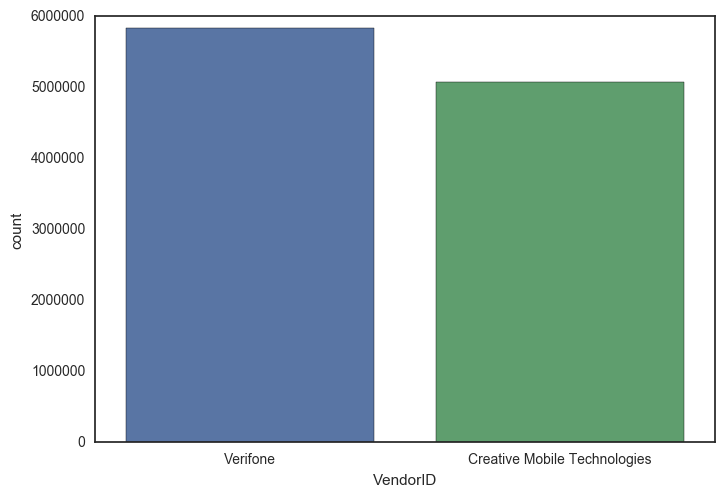

In [4]:
# Barplots showing frequencies of Vendors

# Assign the VendorId labels:
nyctaxi['VendorID'].replace(1, 'Creative Mobile Technologies',inplace=True)
nyctaxi['VendorID'].replace(2, 'Verifone',inplace=True)

sns.countplot(x="VendorID", data=nyctaxi)

Bar Plot for Payment Type

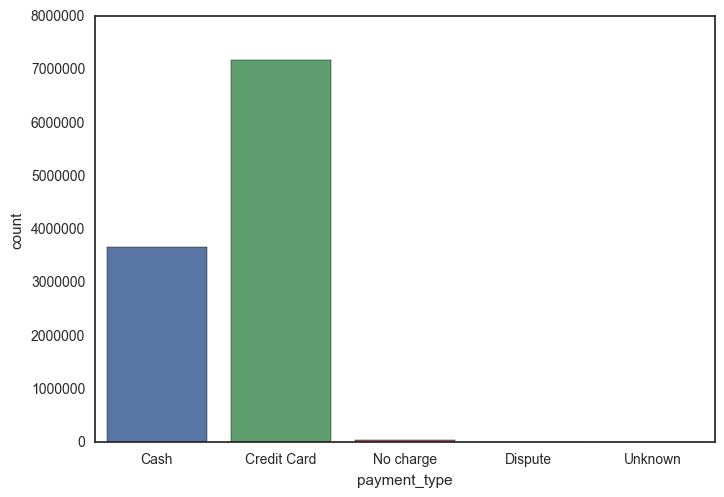

In [5]:
# Barplots showing frequencies of Payment Types

# Assign the Payment-type labels:
nyctaxi['payment_type'].replace(1, 'Credit Card',inplace=True)
nyctaxi['payment_type'].replace(2, 'Cash',inplace=True)
nyctaxi['payment_type'].replace(3, 'No charge',inplace=True)
nyctaxi['payment_type'].replace(4, 'Dispute',inplace=True)
nyctaxi['payment_type'].replace(5, 'Unknown',inplace=True)
nyctaxi['payment_type'].replace(6, 'Voided Trip',inplace=True)

sns.countplot(x="payment_type", data=nyctaxi)